In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

In [2]:
df= pd.read_csv("breast_tumor_classification.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
 df.shape

(569, 32)

In [5]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [6]:
#Check for null values.
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Check for the duplicates rows.
df.duplicated().any()

False

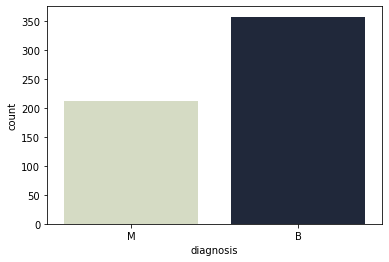

In [10]:
sns.countplot(x = 'diagnosis',data=df,palette ="ch:start=.1,rot=-.6")
plt.show()
#M - Malignant B - Benign

In [11]:
#target variable
dia_dumm = pd.get_dummies(df['diagnosis'])

In [12]:
df= pd.concat([df,dia_dumm],axis=1)

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [14]:
#dropping column 
df = df.drop(['id','diagnosis','B'],axis=1)

In [15]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
X = df.drop('M',axis=1)
y = df['M']

In [17]:
# dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [19]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.304231,0.997852,0.986512,0.136103,0.457127,0.654620,0.811418,0.162263,-0.357312,...,0.967929,0.281395,0.963948,0.941101,0.084000,0.360294,0.513258,0.716764,0.173470,-0.055387
texture_mean,0.304231,1.000000,0.311321,0.297186,0.009986,0.240497,0.297140,0.296437,0.110906,-0.075108,...,0.336194,0.905251,0.347047,0.323267,0.085070,0.277202,0.289704,0.307926,0.109941,0.080590
perimeter_mean,0.997852,0.311321,1.000000,0.986063,0.173230,0.509227,0.695139,0.840800,0.196485,-0.309189,...,0.967844,0.288195,0.969469,0.941998,0.115155,0.404053,0.552025,0.745526,0.194465,-0.011397
area_mean,0.986512,0.297186,0.986063,1.000000,0.149533,0.452539,0.666760,0.813122,0.162577,-0.323431,...,0.958754,0.267217,0.955825,0.958972,0.094222,0.339188,0.499420,0.694462,0.146670,-0.053357
smoothness_mean,0.136103,0.009986,0.173230,0.149533,1.000000,0.667714,0.518482,0.543794,0.536178,0.589552,...,0.185979,0.063056,0.212390,0.185758,0.801666,0.479688,0.449858,0.503223,0.364835,0.523257
compactness_mean,0.457127,0.240497,0.509227,0.452539,0.667714,1.000000,0.870975,0.812297,0.621835,0.565259,...,0.489156,0.248877,0.548307,0.467568,0.566302,0.860437,0.825427,0.805967,0.482526,0.681995
concavity_mean,0.654620,0.297140,0.695139,0.666760,0.518482,0.870975,1.000000,0.919016,0.519625,0.321337,...,0.665471,0.293236,0.709193,0.658096,0.437524,0.729719,0.885436,0.849624,0.385528,0.491768
concave points_mean,0.811418,0.296437,0.840800,0.813122,0.543794,0.812297,0.919016,1.000000,0.481845,0.135781,...,0.821852,0.298627,0.849187,0.803754,0.445638,0.641887,0.763281,0.907002,0.378018,0.337097
symmetry_mean,0.162263,0.110906,0.196485,0.162577,0.536178,0.621835,0.519625,0.481845,1.000000,0.458154,...,0.198148,0.133300,0.232767,0.186166,0.413800,0.500870,0.469112,0.472662,0.679084,0.460556
fractal_dimension_mean,-0.357312,-0.075108,-0.309189,-0.323431,0.589552,0.565259,0.321337,0.135781,0.458154,1.000000,...,-0.298989,-0.056594,-0.250954,-0.271651,0.508305,0.457253,0.339413,0.162477,0.278788,0.785852


In [23]:
#Create classifier using Random Forest method and 
## apply the classier to k-hold Cross validation model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: ", (accuracies.mean()))
print("Standard Deviation: ", (accuracies.std()))

Accuracy:  0.9496153846153847
Standard Deviation:  0.037693397856204035


In [24]:
#Confusion matrix of Random Forest model
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   3]
 [  6  57]]


<AxesSubplot:>

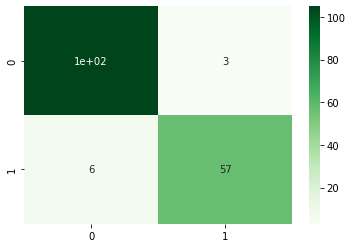

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap="Greens")

In [27]:
#Generate a Naive Bayes model and create Gaussian Classifier
from sklearn.naive_bayes import GaussianNB
NBmodel=GaussianNB()

#Training sets by using the model
NBmodel.fit(X_train, np.ravel(y_train))

#Predict the response for testing
names1 = []
names1.append("Naive Bayes")
scores1 = []
nb_accuracy = NBmodel.score(X_test,np.ravel(y_test))
scores1.append(nb_accuracy)
print("Accuracy: ",nb_accuracy)

Accuracy:  0.9415204678362573


In [28]:
#Confusion matrix of Naive Bayes model
y_pred = NBmodel.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   4]
 [  6  57]]


<AxesSubplot:>

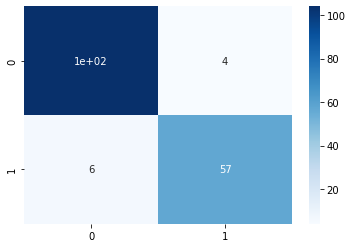

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,cmap="Blues")

In [30]:
#Create classifier using Random Tree method 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
RT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
RT_model.fit(X_train, y_train)

#Predict the response for testing
names2 = []
names2.append("Random Tree")
scores2 = []
RT_accuracy = RT_model.score(X_test,np.ravel(y_test))
scores2.append(RT_accuracy)
print(" Accuracy: ",RT_accuracy)


 Accuracy:  0.9590643274853801


In [31]:
#Confusion matrix of Random tree model
y_pred = RT_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[106   2]
 [  5  58]]


<AxesSubplot:>

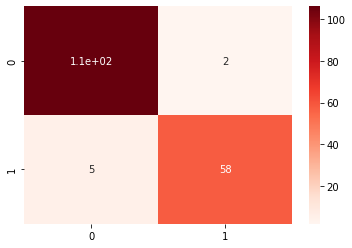

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,cmap="Reds")